In [26]:
from femtoPy.imports import *
import os

%matplotlib inline

<BarContainer object of 31 artists>

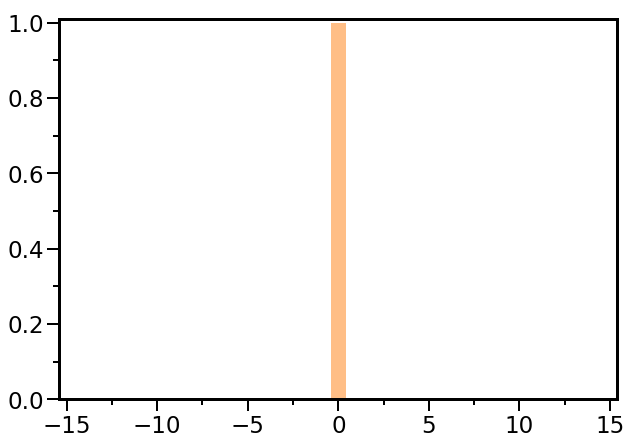

In [117]:
def runLua(runFile):
    os.system('S4 '+str(runFile)+'.lua > .log 2> .err')
    if not os.stat('.err').st_size == 0:
        err=open('.err').read()
        print(err)
    else:
        T=np.loadtxt(dat['trans'])
        R=np.loadtxt(dat['refl'])
    return T,R

def setup(runFile,t,halfWidth):
    dat={
        'f':1.3,
        'theta':0,
        's_amp':1,
        's_phase':0,
        'p_amp':0,
        'p_phase':0,
        'ngr':13, 
        'ngi':0,
        'nsr':1, 'nsi':0,

        'trans':"data/transFlux"+str(halfWidth)+".dat",
        'refl':"data/reflFlux"+str(halfWidth)+".dat",

        'numG':31,

        'tmin':np.amin(t),
        'tmax':np.amax(t),
        'tstep':t[1]-t[0],

        'center':0.5,
        'halfWidth':halfWidth
    }
    file=open(runFile+'.dat','w')
    for key,val in dat.items():
        if type(val)==str:
            file.write(str(key)+'="'+str(val)+'"'+'\n')
        else:
            file.write(str(key)+'='+str(val)+'\n')
    file.close()
    
    return dat

def get_t(i,flux):
    return flux[i*dat['numG']:(i+1)*dat['numG'],:]

t=np.linspace(0,1,20)
halfWidth=np.linspace(0,0.5,20)
for hw in halfWidth:
    dat=setup('init',t,hw)
    T,R=runLua('testThickness')

T1=get_t(0,T)
R1=get_t(0,R)

fig,ax=figure()
ax.bar(R1[:,0],np.absolute(R1[:,3]),alpha=0.5)
ax.bar(R1[:,0],np.absolute(T1[:,2]),alpha=0.5)